In [1]:
import cv2
import os
from skimage.util import random_noise
from imwatermark import WatermarkEncoder
from blind_watermark import WaterMark
from imwatermark import WatermarkDecoder
import numpy as np
import random
import glob
import pandas as pd 

In [2]:
def clear(): #exit program and purge all test files
    files = glob.glob(os.path.join('test','attack_output','*'))
    for f in files:
        os.remove(f)
        print("Removed ", f)

    files = glob.glob(os.path.join('test','output','*'))
    for f in files:
        os.remove(f)
        print("Removed ", f)
    print("Done clearing all test files.")

In [48]:
infolder='test'
outfolder=os.path.join(infolder,'output')
img_path = os.path.join(infolder,'MRI_A.png')

def encodeA(img,txt):

    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    encoder = WaterMark(password_img=1, password_wm=1)
    encoder.read_img(img_path)
    encoder.read_wm(txt,mode='str')
    encoder.embed(out_path)
    
    print(txt," < SUCCESS")

def encodeB(img,txt):
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img)
    encoder.set_watermark('bytes', txt.encode('utf-8'))
    img_encoded = encoder.encode(in_img,'dwtDct')    
    cv2.imwrite(out_path,img_encoded)
    
    print(txt," < SUCCESS")


def encodeC(img,txt):
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img)
    encoder.set_watermark('bytes', txt.encode('utf-8'))
    img_encoded = encoder.encode(in_img,'dwtDctSvd')    
    cv2.imwrite(out_path,img_encoded)
    
    print(txt," < SUCCESS")


def encodeD(img,txt):
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img)
    encoder.set_watermark('bytes', txt.encode('utf-8'))
    encoder.loadModel()
    img_encoded = encoder.encode(in_img,'rivaGan')    
    cv2.imwrite(out_path,img_encoded)
    
    print(txt," < SUCCESS")
        
def decodeA(img,wl): #pass in list
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img)
    word_length=int(wl)
    bytes=(word_length*8)-1
    decoder = WaterMark(password_img=1,password_wm=1)
    output = decoder.extract(img, wm_shape=bytes, mode='str')

    return output

def decodeB(img,wl):
    word_length=int(wl)
    bytes=(word_length*8)
    bgr = cv2.imread(img)
    decoder = WatermarkDecoder('bytes', bytes)
    watermark = decoder.decode(bgr,'dwtDct')
    output = watermark.decode('utf-8')

    return output

def decodeC(img,wl):
    word_length=int(wl)
    bytes=(word_length*8)
    bgr = cv2.imread(img)
    decoder = WatermarkDecoder('bytes', bytes)
    watermark = decoder.decode(bgr,'dwtDctSvd')
    output = watermark.decode('utf-8')
    
    return output

def decodeD(img):
    bgr = cv2.imread(img)
    decoder = WatermarkDecoder('bytes', 32)
    decoder.loadModel()
    watermark = decoder.decode(bgr,'rivaGan')
    output = watermark.decode('utf-8')
    
    return output


In [4]:
text = ['z','cz','zhen','chenzhen','chenzhenzhenchen','chenzhenzhenchenjiachengchengjia']
text4='zhEN'

# Char Length


In [5]:
#Algorithm A Dwt

infolder='test'
outfolder=os.path.join(infolder,'output')
img_path = os.path.join(infolder,'MRI_A.png')

for txt in text:
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    encoder = WaterMark(password_img=1, password_wm=1)
    encoder.read_img(img_path)
    encoder.read_wm(txt,mode='str')
    encoder.embed(out_path)
    
    print(txt," < SUCCESS")

#1-32 char length

z  < SUCCESS
cz  < SUCCESS
zhen  < SUCCESS
chenzhen  < SUCCESS
chenzhenzhenchen  < SUCCESS
chenzhenzhenchenjiachengchengjia  < SUCCESS


In [6]:
#Algorithm B DwtDct

infolder='test'
outfolder=os.path.join(infolder,'output')
img_path = os.path.join(infolder,'MRI_A.png')

encoder = WatermarkEncoder()

for txt in text:
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img_path)
    encoder.set_watermark('bytes', txt.encode('utf-8'))
    img_encoded = encoder.encode(in_img,'dwtDct')    
    cv2.imwrite(out_path,img_encoded)
    
    print(txt," < SUCCESS")

#1-32 char length

z  < SUCCESS
cz  < SUCCESS
zhen  < SUCCESS
chenzhen  < SUCCESS
chenzhenzhenchen  < SUCCESS
chenzhenzhenchenjiachengchengjia  < SUCCESS


In [7]:
#Algorithm C DwtDctSvd

infolder='test'
outfolder=os.path.join(infolder,'output')
img_path = os.path.join(infolder,'MRI_A.png')

encoder = WatermarkEncoder()

for txt in text:
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img_path)
    encoder.set_watermark('bytes', txt.encode('utf-8'))
    img_encoded = encoder.encode(in_img,'dwtDctSvd')    
    cv2.imwrite(out_path,img_encoded)
    
    print(txt," < SUCCESS")

#1-32 char length

z  < SUCCESS
cz  < SUCCESS
zhen  < SUCCESS
chenzhen  < SUCCESS
chenzhenzhenchen  < SUCCESS
chenzhenzhenchenjiachengchengjia  < SUCCESS


In [8]:
#Algorithm D RivaGan

infolder='test'
outfolder=os.path.join(infolder,'output')
img_path = os.path.join(infolder,'MRI_A.png')

encoder = WatermarkEncoder()

for txt in text:
    out_name=txt+'.png'
    out_path = os.path.join(outfolder,out_name)
    in_img = cv2.imread(img_path)
    try:
        encoder.set_watermark('bytes', txt.encode('utf-8'))
        encoder.loadModel()
        img_encoded = encoder.encode(in_img,'rivaGan')    
        cv2.imwrite(out_path,img_encoded)
    except:
        print(txt," < FAIL")
        continue
    
    print(txt," < SUCCESS")

#1-32 char length

z  < FAIL
cz  < FAIL
zhen  < SUCCESS
chenzhen  < FAIL
chenzhenzhenchen  < FAIL
chenzhenzhenchenjiachengchengjia  < FAIL


In [9]:
clear()

Removed  test\output\chenzhen.png
Removed  test\output\chenzhenzhenchen.png
Removed  test\output\chenzhenzhenchenjiachengchengjia.png
Removed  test\output\cz.png
Removed  test\output\z.png
Removed  test\output\zhEN.png
Done clearing all test files.


# Case Sensitivity

In [19]:
encodeA(img_path,text4)
print(decodeA(os.path.join(outfolder,'zhEN.png'),4))
clear()


zhEN  < SUCCESS
zhEN
Removed  test\output\chenzhenzhenchenjiachengchengjia.png
Removed  test\output\zhEN.png
Done clearing all test files.


In [49]:
encodeB(img_path,text4)
print(decodeB(os.path.join(outfolder,'zhEN.png'),4))
clear()

zhEN  < SUCCESS
zhEN
Removed  test\output\zhEN.png
Done clearing all test files.


In [46]:
encodeC(img_path,text4)
print(decodeC(os.path.join(outfolder,'zhEN.png'),4))
clear()

zhEN  < SUCCESS
zhEN
Removed  test\output\zhEN.png
Done clearing all test files.


In [50]:
encodeD(img_path,text4)
print(decodeD(os.path.join(outfolder,'zhEN.png')))
clear()

zhEN  < SUCCESS
zhEN
Removed  test\output\zhEN.png
Done clearing all test files.


# Special Character

In [61]:
textspe='z!@#$z'
textspe4='z!@z'

In [57]:
encodeA(img_path,textspe)
print(decodeA(os.path.join(outfolder,'z!@#$z.png'),6))
clear()


z!@#$z  < SUCCESS
z!@#$z
Removed  test\output\!@#$.png
Removed  test\output\z!@#$z.png
Done clearing all test files.


In [58]:
encodeB(img_path,textspe)
print(decodeB(os.path.join(outfolder,'z!@#$z.png'),6))
clear()

z!@#$z  < SUCCESS
z!@#$z
Removed  test\output\z!@#$z.png
Done clearing all test files.


In [59]:
encodeC(img_path,textspe)
print(decodeC(os.path.join(outfolder,'z!@#$z.png'),6))
clear()

z!@#$z  < SUCCESS
z!@#$z
Removed  test\output\z!@#$z.png
Done clearing all test files.


In [62]:
encodeD(img_path,textspe4)
print(decodeD(os.path.join(outfolder,'z!@z.png')))
clear()

z!@z  < SUCCESS
z!@z
Removed  test\output\z!@z.png
Done clearing all test files.


# Language

In [65]:
text4='zhen'
text4ch='方针富镇'

In [68]:
encodeA(img_path,text4ch)
try:
    print(decodeA(os.path.join(outfolder,'方针富镇.png'),4))
except:
    print("Fail to decode")
clear()


方针富镇  < SUCCESS
Fail to decode
Removed  test\output\æ–¹é’ˆå¯Œé•‡.png
Done clearing all test files.


In [69]:
encodeB(img_path,text4ch)
try:
    print(decodeB(os.path.join(outfolder,'方针富镇.png'),4))
except:
    print("Fail to decode")
clear()

方针富镇  < SUCCESS
Fail to decode
Removed  test\output\æ–¹é’ˆå¯Œé•‡.png
Done clearing all test files.


In [70]:
encodeC(img_path,text4ch)
try:
    print(decodeC(os.path.join(outfolder,'方针富镇.png'),4))
except:
    print("Fail to decode")

    clear()

方针富镇  < SUCCESS
Fail to decode
Removed  test\output\æ–¹é’ˆå¯Œé•‡.png
Done clearing all test files.


In [72]:
try:
    encodeD(img_path,text4ch)
except:
    print("Fail to encode")

try:
    print(decodeD(os.path.join(outfolder,'方针富镇.png'),4))
except:
    print("Fail to decode")
clear()

Fail to encode
Fail to decode
Done clearing all test files.


# Encoding Time

In [ ]:
import time

In [82]:
time_list=[]

for x in range(10):
    s = time.time()
    encodeA(img_path,text4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
Generated in 1.82 seconds averagely


In [83]:
time_list=[]

for x in range(10):
    s = time.time()
    encodeB(img_path,text4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
Generated in 0.16 seconds averagely


In [84]:
time_list=[]

for x in range(10):
    s = time.time()
    encodeC(img_path,text4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
Generated in 0.46 seconds averagely


In [85]:
time_list=[]

for x in range(10):
    s = time.time()
    encodeD(img_path,text4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
zhen  < SUCCESS
Generated in 0.96 seconds averagely


# Decoding Time

In [92]:
time_list=[]
encodeA(img_path,text4)

for x in range(10):
    s = time.time()
    decodeA(os.path.join(outfolder,'zhEN.png'),4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
Generated in 1.35 seconds averagely
Removed  test\output\zhen.png
Done clearing all test files.


In [88]:
time_list=[]
encodeB(img_path,text4)


for x in range(10):
    s = time.time()
    decodeB(os.path.join(outfolder,'zhEN.png'),4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
Generated in 0.09 seconds averagely
Removed  test\output\zhen.png
Done clearing all test files.


In [89]:
time_list=[]
encodeC(img_path,text4)

for x in range(10):
    s = time.time()
    decodeC(os.path.join(outfolder,'zhEN.png'),4)
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
Generated in 0.27 seconds averagely
Removed  test\output\zhen.png
Done clearing all test files.


In [91]:
time_list=[]
encodeD(img_path,text4)

for x in range(10):
    s = time.time()
    decodeD(os.path.join(outfolder,'zhEN.png'))
    time_list.append(time.time() - s)
   
elapsed=sum(time_list)/len(time_list)
print('Generated in {} seconds averagely'.format(str(elapsed)[:4]))
clear()

zhen  < SUCCESS
Generated in 1.13 seconds averagely
Removed  test\output\zhen.png
Done clearing all test files.


# Size Diferrences After Encoding

In [161]:
#random string generator
import random
import string

letters = string.ascii_letters
print ( ''.join(random.choice(letters) for i in range(1)) )


C


In [162]:
original=os.path.getsize(img_path)
print(original)
rand_text=['c'
      ,'Uh'
      ,'QWpt'
      ,'LTmUvWnd'
      ,'lflLuAdAgVwXNYvO'
      ,'ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR'
      ,'SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY'
     ,'BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI']

414108


In [163]:
a_size_list=[]

for txt in rand_text:
    encodeA(img_path,txt)
    filename=txt+'.png'
    a_size_list.append(os.path.getsize(os.path.join(outfolder,filename)))
    
print(a_size_list)
clear()

c  < SUCCESS
Uh  < SUCCESS
QWpt  < SUCCESS
LTmUvWnd  < SUCCESS
lflLuAdAgVwXNYvO  < SUCCESS
ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR  < SUCCESS
SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY  < SUCCESS
BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI  < SUCCESS
[416566, 413374, 410857, 414463, 413076, 413548, 412385, 412346]
Removed  test\output\BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI.png
Removed  test\output\c.png
Removed  test\output\lflLuAdAgVwXNYvO.png
Removed  test\output\LTmUvWnd.png
Removed  test\output\QWpt.png
Removed  test\output\SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY.png
Removed  test\output\Uh.png
Removed  test\output\ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR.png
Done clearing all test files.


In [164]:
b_size_list=[]

for txt in rand_text:
    encodeB(img_path,txt)
    filename=txt+'.png'
    b_size_list.append(os.path.getsize(os.path.join(outfolder,filename)))
    
print(b_size_list)
clear()

c  < SUCCESS
Uh  < SUCCESS
QWpt  < SUCCESS
LTmUvWnd  < SUCCESS
lflLuAdAgVwXNYvO  < SUCCESS
ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR  < SUCCESS
SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY  < SUCCESS
BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI  < SUCCESS
[417424, 416663, 417047, 417650, 417326, 417736, 417186, 417269]
Removed  test\output\BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI.png
Removed  test\output\c.png
Removed  test\output\lflLuAdAgVwXNYvO.png
Removed  test\output\LTmUvWnd.png
Removed  test\output\QWpt.png
Removed  test\output\SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY.png
Removed  test\output\Uh.png
Removed  test\output\ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR.png
Done clearing all test files.


In [165]:
c_size_list=[]

for txt in rand_text:
    encodeC(img_path,txt)
    filename=txt+'.png'
    c_size_list.append(os.path.getsize(os.path.join(outfolder,filename)))
    
print(c_size_list)
clear()

c  < SUCCESS
Uh  < SUCCESS
QWpt  < SUCCESS
LTmUvWnd  < SUCCESS
lflLuAdAgVwXNYvO  < SUCCESS
ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR  < SUCCESS
SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY  < SUCCESS
BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI  < SUCCESS
[417927, 418335, 417923, 418204, 417995, 418138, 418091, 417987]
Removed  test\output\BGrTYOidxnHMhnWPfKpYCriCmlVNqBpoZGkFNaMWcgUekSbHuzANtsyEzsSrTFNEtRthgYKdirriUQqirbAYybInPreQwIRrkmsCmqvzZLlDWqiOxOiPbrZtRcxpwOoI.png
Removed  test\output\c.png
Removed  test\output\lflLuAdAgVwXNYvO.png
Removed  test\output\LTmUvWnd.png
Removed  test\output\QWpt.png
Removed  test\output\SVAGvpxVaZYYEoZCdWnlcdHjXYbkIlgYmcjMUuqWIHwUFclhMEVxBVKNWSvTSJRY.png
Removed  test\output\Uh.png
Removed  test\output\ZxoViUwvwWhkLBJgUFKbmSruuWdJZvvR.png
Done clearing all test files.


In [133]:
d_size_list=[]

encodeD(img_path,text4)
filename=text4+'.png'
d_size_list.append(os.path.getsize(os.path.join(outfolder,filename)))
    
print(d_size_list)
clear()

zhen  < SUCCESS
[431121]
Removed  test\output\zhen.png
Done clearing all test files.


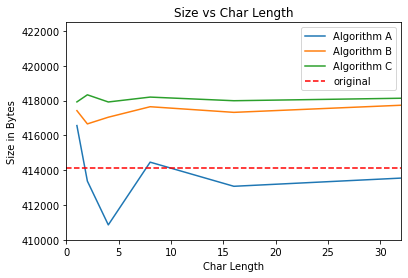

In [169]:
import matplotlib.pyplot as plt
x=[1,2,4,8,16,32,64,128]
x1=[4]

plt.plot(x,a_size_list, label='Algorithm A')
plt.plot(x,b_size_list, label='Algorithm B')
plt.plot(x,c_size_list, label='Algorithm C')
plt.xlabel('Char Length')
plt.ylabel('Size in Bytes')
plt.title('Size vs Char Length')
plt.axis([0, 32, 410000, 422500])
plt.plot(32, 431121, 'bo')  # plot x and y using blue circle markers
plt.axhline(y=414108, color='r', linestyle='--', label='original')
plt.legend()
plt.show()

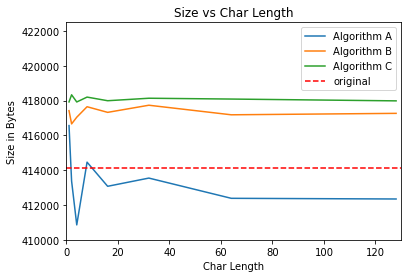

In [170]:
import matplotlib.pyplot as plt
x=[1,2,4,8,16,32,64,128]
x1=[4]

plt.plot(x,a_size_list, label='Algorithm A')
plt.plot(x,b_size_list, label='Algorithm B')
plt.plot(x,c_size_list, label='Algorithm C')
plt.xlabel('Char Length')
plt.ylabel('Size in Bytes')
plt.title('Size vs Char Length')
plt.axis([0, 130, 410000, 422500])
plt.plot(32, 431121, 'bo')  # plot x and y using blue circle markers
plt.axhline(y=414108, color='r', linestyle='--', label='original')
plt.legend()
plt.show()